# ProCharity

# Table of contents

I. Data overview. General information. Interim conclusions.


II. Data preprocessing. Interim conclusions.
- Table headers processing.
- Data type conversion
- Duplicate handling.
- Missing values handling.
-  Artifact detection.
- Addition of calculated data.


III. Exploratory Data Analysis (EDA).
- Dynamics of volunteer registrations by month.
- Dynamics of volunteer moderation by month. Analysis of moderation duration.
- Conversion from registration to moderation and response? (funnel over time)
- Volunteer retention. Duration of activity (in months).
- Analysis of time between volunteer registration and first response.
- Relationship between volunteer performer selection, registration period, and number of tasks completed.


IV. General conclusion.

<div style="background-color:red;color:white;padding:10px;">
Attention: Github performs a static render of the notebooks and it doesn't include the embedded HTML/JavaScript that makes up a plotly graph . Therefore, all plotly charts in this notebook will be presented as static attached png files.    
</div>        

In [1]:
# libraries import
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import unicodedata
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta

In [2]:
# seaborn customization
sns.set(rc={'figure.figsize':(10,5)})
sns.set_theme(style='whitegrid', palette='dark')

In [3]:
# pandas customization
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option("display.max_columns", 100)

# Data overview. General information.

In [4]:
# reading the file and saving it to the variables
volunteers = pd.read_excel('\home\yuso\jupyter_dir\jupyter_env\datasets\pro_charity_end.xlsx')
statistics = pd.read_excel('\home\yuso\jupyter_dir\jupyter_env\datasets\pro_charity_end.xlsx', sheet_name=2)

In [5]:
# data slice from 2020.
volunteers = volunteers.query('Date_Created > "2019-12-31"')
statistics = statistics.query('Date > "2019-12-31 23:00:00"')

In [6]:
# primary data analysis function
def get_info(df):
    '''The function takes a dataframe as an input and provides general information about it: dataframe shape (rows, columns),
    columns data type, number of non-null values (DataFrame.info()), first five rows (DataFrame.head(5)) and also brief 
    analysis for categorical and numerical data - DataFrame.describe().'''
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'Total number of rows: {df.shape[0]}, total number of columns: {df.shape[1]}.')
    print()
    print(df.info())
    display(df.head(5))
    display(df.tail(5))
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [7]:
# primary data analysis
get_info(volunteers)

Total number of rows: 5730, total number of columns: 20.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5730 entries, 1658 to 7387
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Category               3765 non-null   object        
 1   City                   2651 non-null   object        
 2   Date_BirthDay          3025 non-null   object        
 3   Date_Created           5730 non-null   datetime64[ns]
 4   Date_FirstRespond      1431 non-null   datetime64[ns]
 5   Date_FirstTask         820 non-null    datetime64[ns]
 6   Date_LastRespond       1426 non-null   datetime64[ns]
 7   Date_LastTask          649 non-null    datetime64[ns]
 8   Date_Lastvisit         5727 non-null   object        
 9   Date_Moderation        2310 non-null   datetime64[ns]
 10  Date_ModerationDenial  2733 non-null   datetime64[ns]
 11  Email_Digest           5730 non-null   bool          
 12  E

,Category,City,Date_BirthDay,Date_Created,Date_FirstRespond,Date_FirstTask,Date_LastRespond,Date_LastTask,Date_Lastvisit,Date_Moderation,Date_ModerationDenial,Email_Digest,Email_NewTasks,Status,Bonuses,ID_Company,ID_Volunteer,Number_Responds,Number_Reviews,Number_Tasks
1658,"Переводы,",Северск,1978-10-24 00:00:00,2020-01-02 09:20:52,NaT,NaT,NaT,NaT,2020-01-02 00:00:00,NaT,2020-01-05,True,True,Не прошел модерацию,0,0,12 315,0,0,0
1659,NaN,NaN,NaN,2020-01-03 10:16:40,NaT,NaT,NaT,NaT,2020-01-03 00:00:00,NaT,2020-01-05,True,True,Не прошел модерацию,0,0,12 316,0,0,0
1660,"Стратегический консалтинг,Финансы и фандрайзинг,",Москва,1970-03-16 00:00:00,2020-01-04 10:18:29,NaT,NaT,NaT,NaT,2020-01-04 00:00:00,NaT,2020-01-05,True,True,Не прошел модерацию,0,0,12 320,0,0,0
1661,NaN,NaN,NaN,2020-01-05 11:29:13,NaT,NaT,NaT,NaT,2020-01-05 00:00:00,NaT,2020-01-05,True,True,Не прошел модерацию,0,0,12 337,0,0,0
1662,"Маркетинг и коммуникации,Стратегический консал...",Москва,1987-08-28 00:00:00,2020-01-05 05:10:11,NaT,NaT,NaT,NaT,2020-01-07 00:00:00,2020-01-05,2020-01-05,True,True,Промодерирован,0,0,12 341,0,0,0


,Category,City,Date_BirthDay,Date_Created,Date_FirstRespond,Date_FirstTask,Date_LastRespond,Date_LastTask,Date_Lastvisit,Date_Moderation,Date_ModerationDenial,Email_Digest,Email_NewTasks,Status,Bonuses,ID_Company,ID_Volunteer,Number_Responds,Number_Reviews,Number_Tasks
7383,NaN,NaN,NaN,2022-06-20 05:24:25,NaT,NaT,NaT,NaT,2022-06-20 00:00:00,NaT,NaT,True,False,Новый,0,0,102 562,0,0,0
7384,"IT,Стратегический консалтинг,",NaN,1988-10-15 00:00:00,2022-06-20 06:18:34,NaT,NaT,NaT,NaT,2022-06-20 00:00:00,NaT,NaT,True,False,Ожидает модерации,0,0,102 568,0,0,0
7385,"IT,",Санкт-Петербург,1988-08-25 00:00:00,2022-06-20 07:45:27,NaT,NaT,NaT,NaT,2022-06-20 00:00:00,NaT,NaT,True,False,Ожидает модерации,0,0,102 576,0,0,0
7386,"Дизайн и Верстка,",Санкт- Петербург,1991-12-02 00:00:00,2022-06-20 09:03:39,2022-06-20,NaT,2022-06-20,NaT,2022-06-20 00:00:00,NaT,NaT,True,False,Ожидает модерации,0,0,102 586,1,0,0
7387,"IT,Обучение и тренинги,",Санкт-Петербург,1986-09-27 00:00:00,2022-06-20 09:09:05,NaT,NaT,NaT,NaT,2022-06-20 00:00:00,NaT,NaT,True,False,Ожидает модерации,0,5 046,102 587,0,0,0


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
Category,3765,199,"Дизайн и Верстка,",545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,2651,459,Москва,996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_BirthDay,3025,2593,#Error,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_Lastvisit,5727,851,2022-06-20 00:00:00,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,5729,4,Не прошел модерацию,2413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonuses,"5,730.00",NaN,NaN,NaN,0.78,4.46,-2.00,0.00,0.00,0.00,0.00,0.00,146.00
ID_Company,"5,730.00",23.00,0.00,"5,102.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_Volunteer,5730,5730,12 315,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_Responds,"5,730.00",NaN,NaN,NaN,1.15,4.50,0.00,0.00,0.00,0.00,0.00,1.00,85.00
Number_Reviews,"5,730.00",NaN,NaN,NaN,0.45,2.47,0.00,0.00,0.00,0.00,0.00,0.00,70.00


In [8]:
# primary data analysis
get_info(statistics)

Total number of rows: 22932, total number of columns: 6.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22932 entries, 3580 to 26511
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          22932 non-null  datetime64[ns]
 1   Status        22932 non-null  object        
 2   ID            22932 non-null  object        
 3   ID_Category   22932 non-null  int64         
 4   ID_Task       22932 non-null  object        
 5   ID_Volunteer  22932 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB
None


,Date,Status,ID,ID_Category,ID_Task,ID_Volunteer
3580,2020-01-01 21:35:03,Заявка,3 581,4,11 795,4 164
3581,2020-01-02 17:00:28,Выбран исполнитель,3 582,6,12 238,11 968
3582,2020-01-03 04:26:27,Заявка,3 583,12,12 218,11 731
3583,2020-01-03 22:09:46,Первая заявка,3 584,4,11 277,10 065
3584,2020-01-04 10:26:29,Работа принята фондом,3 585,4,12 194,8 109


,Date,Status,ID,ID_Category,ID_Task,ID_Volunteer
26507,2022-06-20 21:09:03,Первая заявка,26 510,12,102 322,23 189
26508,2022-06-20 21:18:27,Первая заявка,26 511,12,102 336,5 631
26509,2022-06-20 21:22:24,Выбран исполнитель,26 512,12,102 322,23 189
26510,2022-06-20 21:51:55,Заявка,26 513,1,101 161,102 586
26511,2022-06-20 23:59:03,Работа принята фондом,26 514,6,101 943,44 325


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
Status,22932,5,Задание одобрено,5380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID,22932,22932,3 581,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_Category,"22,932.00",NaN,NaN,NaN,3.88,4.76,0.00,1.00,2.00,2.00,3.00,6.00,39.00
ID_Task,22932,5465,35 068,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_Volunteer,"22,932.00","1,720.00",0.00,"5,384.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**According to the documentation:**

*Volunteers:*

| Column | Data |
| --- | --- |
| ID_Volunteer (PK) | Volunteer ID |
| Name | Name |
| Surname | Surname |
| City | City of residence |
| Category | List of categories separated by commas |
| Status | Moderation status |
| Date_Lastvisit | Date of last login |
| Date_Moderation | Date of moderation |
| Date_FirstTask | Date of the first completed task |
| Date_LastTask | Date of the last completed task |
| Date_ModerationDenial | Date of moderation denial |
| Date_BirthDay | Birth date |
| Date_FirstRespond | Date of the first response |
| Date_LastRespond | Date of the last response |
| ID_Company (FK) | ID of the company where the volunteer works |
| Bonuses | Number of earned bonuses |
| Number_Responds | Number of responses |
| Number_Tasks | Number of completed tasks |
| Number_Reviews | Number of reviews |
| Email_NewTasks | Subscription to new tasks |
| Email_Digest | Subscription to weekly task digest |
| Date_Created | Date of registration |

*Statistics:*

| Column | Data |
| --- | --- |
| ID (PK) | Event ID |
| ID_Task (FK) | Task ID |
| ID_Volunteer (FK) | Volunteer ID |
| Status | Status |
| ID_Category (FK) | Task category ID |
| Date | Event date |

## Interim conslusions

Working with two data frames: information about volunteers (ID, date of birth, moderation, first response, etc.) and statistical information about tasks (events) (volunteer ID, creation date, applications, executor, etc.)

### Volunteers:

- number of records - 5730;
- a combination of upper and lower case in column names;
- missing values in columns: Category, City, Date_BirthDay, Date_Created, Date_FirstRespond, Date_FirstTask, Date_LastRespond, Date_LastTask, Date_Lastvisit, Date_Moderation, - Date_ModerationDenial;
- data type of Date_BirthDay, Date_Lastvisit - object (need to be datetime);
- data type of ID_Company, ID_Volunteer - object (need to be int64);
- the most popular category of volunteers is design and layout, the city is Moscow;
- number of unique categories - 199 (one record can belong to several categories), cities - 459 (check - for duplicates, convert to lowercase);
- Date_BirthDay - incorrect value #Error - occurs 6 times;
- 2413 out of 5730 volunteers have the status "Not Moderated";

### Statistics:

- number of records - 22932;
- a combination of upper and lower case in column names;
- no missing data;
- numeric columns ID, ID_Category, ID_Task, ID_Volunteer have object data type (better to be int64);
- number of unique task statuses - 5 (check for duplicates, convert to lowercase).

# Data preprocessing

### Colun headings processing

In [9]:
# to lowercase
volunteers.columns = volunteers.columns.str.lower()
statistics.columns = statistics.columns.str.lower()

### Data type change

In [10]:
# to int64 function
def to_int(value):
        if type(value) == str:
            value = unicodedata.normalize('NFKD', value).replace(' ', '')
        elif type(value) == int:
            pass
        return value

In [11]:
# to int64 for id_volunteer coulumn (volunteers set)
volunteers['id_volunteer'] = volunteers['id_volunteer'].apply(to_int)
volunteers['id_volunteer'] = volunteers['id_volunteer'].astype('int64', errors='raise')

In [12]:
# to int64 for id_company column
volunteers['id_company'] = volunteers['id_company'].apply(to_int)
volunteers['id_company'] = volunteers['id_company'].astype('int64', errors='raise')

In [13]:
# to int64 for id_volunteer column (statistics set)
statistics['id_volunteer'] = statistics['id_volunteer'].apply(to_int)
statistics['id_volunteer'] = statistics['id_volunteer'].astype('int64', errors='raise')

In [14]:
# to int64 for id_task column
statistics['id_task'] = statistics['id_task'].apply(to_int)
statistics['id_task'] = statistics['id_task'].astype('int64', errors='raise')

During the process of converting columns with date/time to datetime type, artifacts were found.

In [15]:
# deletion artifacts from columns date_birthday и date_lastvisit 
volunteers['date_birthday'] = volunteers['date_birthday'].replace('#Error', 'NaN')
volunteers['date_lastvisit'] = volunteers['date_lastvisit'].replace('#Error', 'NaN')

In [16]:
# to datetime, min и max dates
volunteers['date_lastvisit'] = pd.to_datetime(volunteers['date_lastvisit'], errors='raise')
print('The earliest date of the last visit:', volunteers['date_lastvisit'].min().date())
print('The latest date of the last visit:', volunteers['date_lastvisit'].max().date())

The earliest date of the last visit: 2020-01-02
The latest date of the last visit: 2022-06-21


In [17]:
# to datetime, min и max dates
volunteers['date_birthday'] = pd.to_datetime(volunteers['date_birthday'], errors='coerce')
print('Min DOB:', volunteers['date_birthday'].min().date())
print('Max DOB:', volunteers['date_birthday'].max().date())

Min DOB: 1876-12-13
Max DOB: 2022-11-16


Perhaps it is worth setting a temporary limit on entering the date of birth (1900 - ...).

### Duplicates processing

In [18]:
# columns for processing
obj_cols_list = volunteers.select_dtypes(include='object').columns.tolist()
# to lowercase
volunteers = volunteers.apply(lambda x: x.str.lower() if x.name in obj_cols_list else x)
volunteers = volunteers.apply(lambda x: x.str.replace('ё','е') if x.name in obj_cols_list else x)
statistics['status'] = statistics['status'].apply(lambda x: x.lower())

In [19]:
# duplicates check
print(volunteers.duplicated().sum())
print(statistics.duplicated().sum())

0
0


In [20]:
# unique values of the status column (volunteers set)
volunteers['status'].value_counts()

не прошел модерацию    2413
промодерирован         2303
новый                  1009
ожидает модерации         4
Name: status, dtype: int64

In [21]:
# missing values count
volunteers['status'].isna().sum()

1

In [22]:
# delete record with NaN
volunteers = volunteers.dropna(subset=['status'])

In [23]:
# unique values of the status columns (statistics set)
statistics['status'].unique()

array(['заявка', 'выбран исполнитель', 'первая заявка',
       'работа принята фондом', 'задание одобрено'], dtype=object)

### Missing values processing

In [24]:
# NaN ratio
report = volunteers.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (100 * report['missing_values'] / volunteers.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)
report.style.background_gradient('coolwarm')

,missing_values,% of total
category,1965,34.300000
city,3078,53.730000
date_birthday,2712,47.340000
date_created,0,0.000000
date_firstrespond,4298,75.020000
date_firsttask,4909,85.690000
date_lastrespond,4303,75.110000
date_lasttask,5080,88.670000
date_lastvisit,3,0.050000
date_moderation,3419,59.680000


In [25]:
# NaN in the moderation date
mod_nan = volunteers.query('date_moderation != date_moderation')
mod_nan.sample(5, random_state=666)

,category,city,date_birthday,date_created,date_firstrespond,date_firsttask,date_lastrespond,date_lasttask,date_lastvisit,date_moderation,date_moderationdenial,email_digest,email_newtasks,status,bonuses,id_company,id_volunteer,number_responds,number_reviews,number_tasks
5502,NaN,NaN,NaT,2022-01-01 06:42:54,NaT,NaT,NaT,NaT,2022-01-01,NaT,NaT,True,True,новый,0,0,44556,0,0,0
2714,NaN,NaN,NaT,2020-08-17 05:00:57,NaT,NaT,NaT,NaT,2020-08-17,NaT,2020-08-18,True,True,не прошел модерацию,0,0,22292,0,0,0
3492,NaN,NaN,NaT,2021-02-19 10:55:42,NaT,NaT,NaT,NaT,2021-02-19,NaT,2021-02-20,True,True,не прошел модерацию,0,0,29753,0,0,0
3087,NaN,NaN,NaT,2020-11-29 07:13:16,NaT,NaT,NaT,NaT,2020-11-29,NaT,2020-11-30,True,True,не прошел модерацию,0,0,26230,0,0,0
6605,NaN,NaN,NaT,2022-04-21 04:04:55,NaT,NaT,NaT,NaT,2022-04-21,NaT,NaT,True,False,новый,0,0,50491,0,0,0


In [26]:
# user states with NaN in the moderation date
mod_nan['status'].value_counts().to_frame()

,status
не прошел модерацию,2406
новый,1009
ожидает модерации,4


There are a large number of missing values in the data.

- Missing values in city, category, and date_birthday are related to the fact that the volunteer did not provide this information;
- Almost 80% of registered volunteers have no information about the date of the first/last response and the date of the first/last task;
- The moderation date is missing in 59.6% of cases.    

We cannot fill in the missing data, but we will take them into account when conducting EDA.

### Date\time check (data artifacts)

In [27]:
# checking account creation dates
print('Min registration date:', volunteers['date_created'].min())
print('Max registration date:', volunteers['date_created'].max())

Min registration date: 2020-01-02 09:20:52
Max registration date: 2022-06-20 09:09:05


In [28]:
# checking first response dates
print('Min date of the first response:', volunteers['date_firstrespond'].min())
print('Мax date of the first responseка:', volunteers['date_firstrespond'].max())

Min date of the first response: 2020-01-15 00:00:00
Мax date of the first responseка: 2022-06-20 00:00:00


In [29]:
# checking moderation dates
print('Min moderation date:', volunteers['date_moderation'].min())
print('Max moderation date:', volunteers['date_moderation'].max())

Min moderation date: 2020-01-05 00:00:00
Max moderation date: 2022-06-20 00:00:00


### Dataframe editing (add calculated fields)

In this section, we will extract the year and month from the registration and moderation dates into separate columns.

In [30]:
# calculated data
volunteers['month_created'] = volunteers['date_created'].dt.month
volunteers['year_created'] = volunteers['date_created'].dt.year
volunteers['month_moderation'] = volunteers['date_moderation'].dt.month
volunteers['year_moderation'] = volunteers['date_moderation'].dt.year

# check
volunteers.sample(5)

,category,city,date_birthday,date_created,date_firstrespond,date_firsttask,date_lastrespond,date_lasttask,date_lastvisit,date_moderation,date_moderationdenial,email_digest,email_newtasks,status,bonuses,id_company,id_volunteer,number_responds,number_reviews,number_tasks,month_created,year_created,month_moderation,year_moderation
6605,NaN,NaN,NaT,2022-04-21 04:04:55,NaT,NaT,NaT,NaT,2022-04-21,NaT,NaT,True,False,новый,0,0,50491,0,0,0,4,2022,NaN,NaN
4797,"дизайн и верстка,",домодедово,NaT,2021-09-28 12:02:21,2021-09-29,2021-09-29,2022-05-24,2022-06-04,2022-06-16,2021-09-28,NaT,False,False,промодерирован,40,0,39619,22,16,17,9,2021,9.00,"2,021.00"
5118,"дизайн и верстка,",санкт-петербург,1986-01-13,2021-11-13 11:48:36,2021-11-13,NaT,2021-11-13,NaT,2021-11-15,2021-11-15,NaT,False,False,промодерирован,0,0,42038,1,0,0,11,2021,11.00,"2,021.00"
3144,NaN,NaN,NaT,2020-12-07 12:08:22,NaT,NaT,NaT,NaT,2020-12-07,NaT,2020-12-08,True,True,не прошел модерацию,0,0,26669,0,0,0,12,2020,NaN,NaN
1969,"дизайн и верстка,",NaN,1994-02-24,2020-03-29 11:54:10,2020-04-07,2020-04-08,2020-04-20,2021-01-14,2020-05-28,2020-04-07,2020-04-02,True,True,промодерирован,3,0,15390,4,2,2,3,2020,4.00,"2,020.00"


During the data preprocessing, the following was performed:

- renaming columns;
- changing data type (object to int64, object to datetime);
- checking for complete duplicates using the duplicated() method;
- checking for implicit duplicates (lowercase conversion, processing of the letter "ё", viewing unique values);
- checking for date/time data artifacts - minimum and maximum values;
- counting and processing of missing values;
- adding calculated data (separating the month and year of user registration into separate columns).

# Exploratory Data Analysis (EDA)

## Registrations dynamics of volunteers by month

We can create a line chart of the registration dynamics using a pivot table, where the index is the month number, and the values are the number of users registered in that month. We first filter the data by the year of registration.

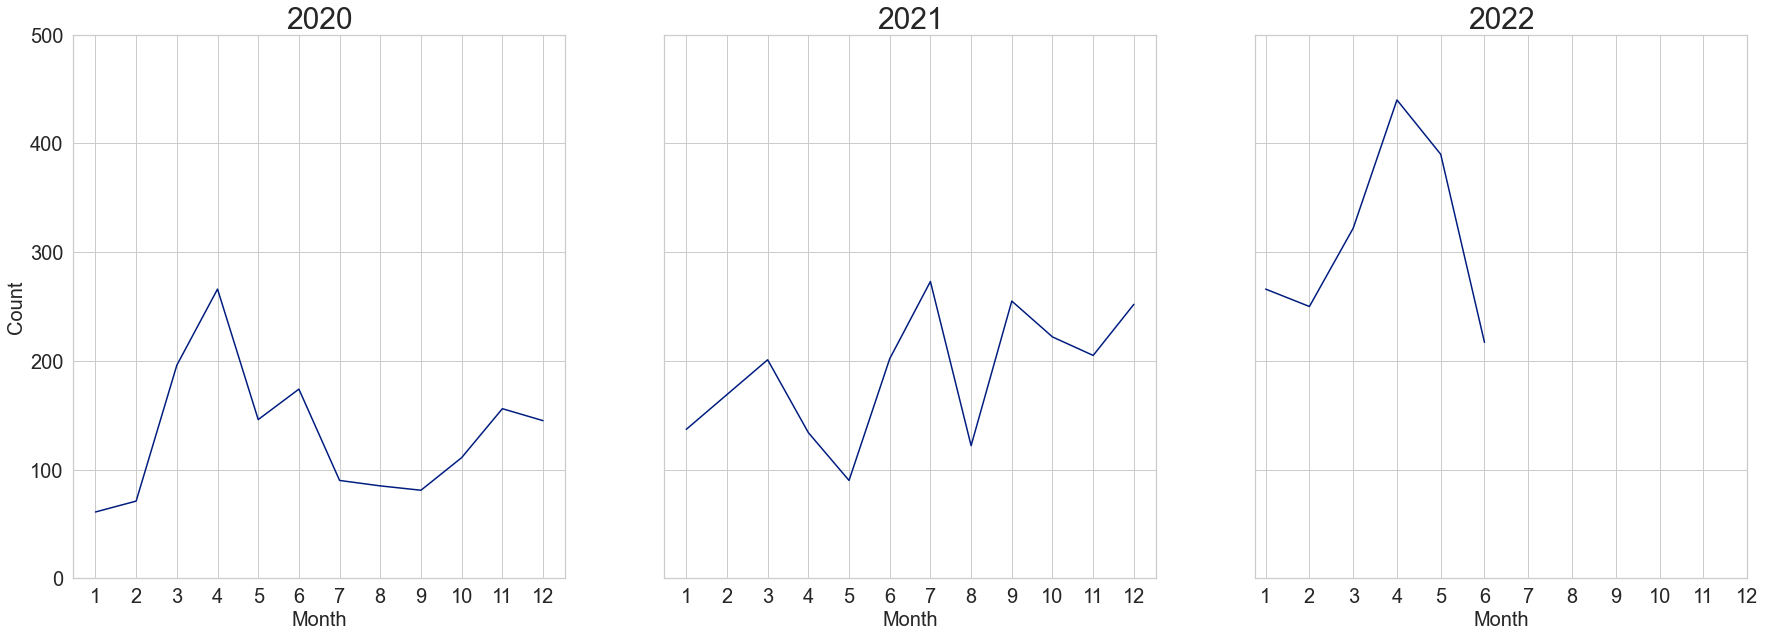

In [31]:
# registration dynamics 2020-2022гг.
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10), sharey=True)
plt.ylim(0, 500)
years = [2020, 2021, 2022]
for year, ax in zip(years, axs.ravel()):
    volunteers[volunteers['year_created'] == year].pivot_table(
        index='month_created', values='id_volunteer', aggfunc='count').plot(ax=ax, legend=None)
    ax.set_title(year, fontsize=30)
    ax.set_xlabel('Month', fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xticks(np.arange(1,13,1));

*Conclusions:*
- the number of registrations has a positive trend;
- we observe registration spikes in April 2020 and 2022 (April 7 - Charity Day, events held on the platform).

## Volunteer moderation dynamics by months

We create a similar line graph using a pivot table. Moderation date is missing in 59.6% of records, so we analyze only 40.4%.

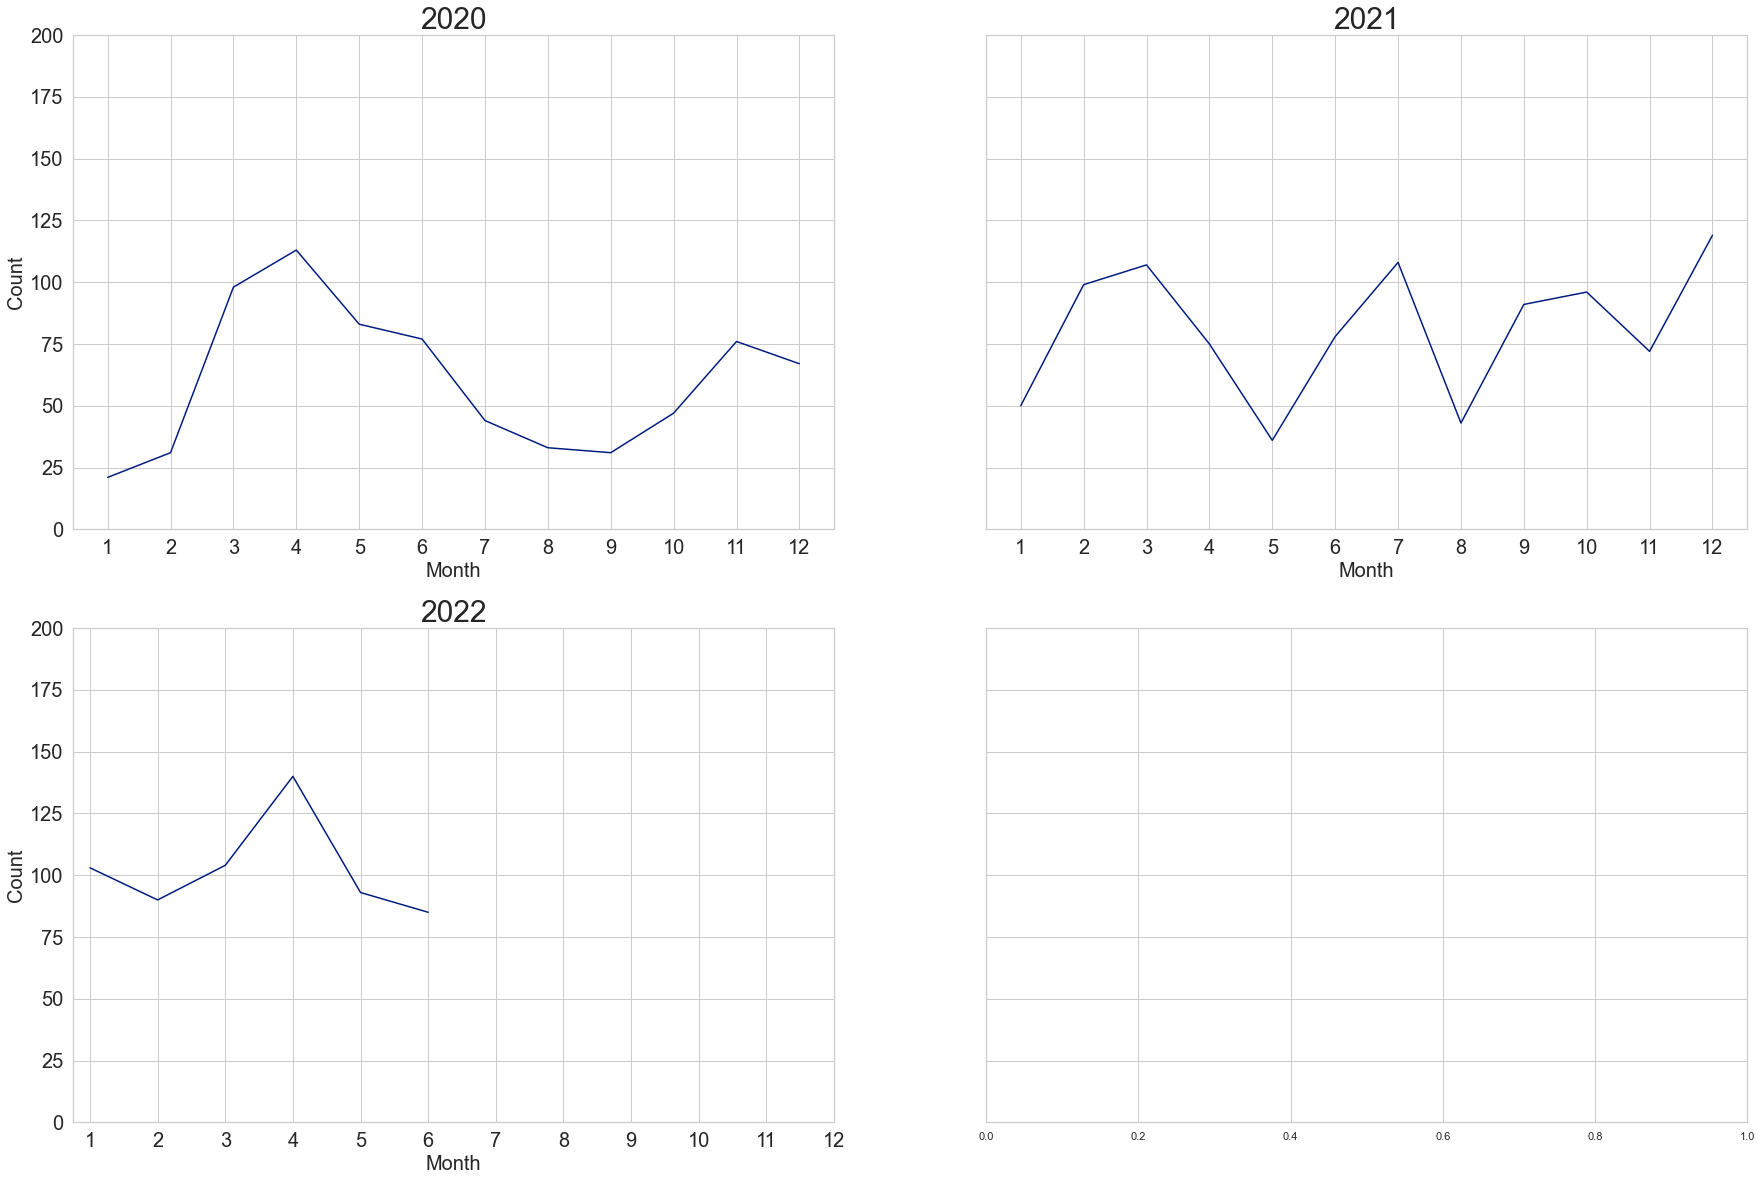

In [32]:
# moderation dynamics 2020-2022гг.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 20), sharey=True)
plt.ylim(0, 200)
years = [2020, 2021, 2022]
for year, ax in zip(years, axs.ravel()):
    volunteers[volunteers['year_moderation'] == year].pivot_table(
        index='month_moderation', values='id_volunteer', aggfunc='count').plot(ax=ax, legend=None)
    ax.set_title(year, fontsize=30)
    ax.set_xlabel('Month', fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xticks(np.arange(1,13,1));

*Conclusions:*
- there is no clear trend, with fluctuations ranging from 50 to 125 moderations per month.

## Analysis of moderation duration

As a large number of users receive rejection during moderation and do not return to it, we will consider two metrics:

- duration between the date of rejection and the date of moderation (for users who return to moderation);
- duration between registration and decision (rejection / moderation) - the main metric;

We will filter users with a status of "new" - there is no moderation date and date of moderation refusal, as well as with a status of "waiting for moderation".

In [33]:
# subset with moderation data
data_moderation = (volunteers[['date_created', 'date_moderation', 'date_moderationdenial', 
                               'status', 'month_created', 'year_created']]
                   .query('status != "новый" & status != "ожидает модерации"'))
data_moderation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4716 entries, 1658 to 7380
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_created           4716 non-null   datetime64[ns]
 1   date_moderation        2310 non-null   datetime64[ns]
 2   date_moderationdenial  2733 non-null   datetime64[ns]
 3   status                 4716 non-null   object        
 4   month_created          4716 non-null   int64         
 5   year_created           4716 non-null   int64         
dtypes: datetime64[ns](3), int64(2), object(1)
memory usage: 257.9+ KB


In [34]:
# status check
data_moderation.status.unique()

array(['не прошел модерацию', 'промодерирован'], dtype=object)

We have a total of 4716 users, of which 2310 have completed moderation (either immediately or after rejection), and 2733 have been rejected (most of whom did not return to moderation as the moderation date is only filled in 2310 cases).

In [35]:
# extract moderation date, registration date, moderation denial date
data_moderation['date_created'] = data_moderation['date_created'].dt.date
data_moderation['date_moderation'] = data_moderation['date_moderation'].dt.date
data_moderation['date_moderationdenial'] = data_moderation['date_moderationdenial'].dt.date

In [36]:
# denial rows
mod_denial = data_moderation.query('date_moderationdenial == date_moderationdenial', engine='python')
mod_denial.sample(3, random_state=123)

,date_created,date_moderation,date_moderationdenial,status,month_created,year_created
3281,2021-01-13,2021-07-09,2021-01-13,промодерирован,1,2021
6363,2022-04-04,2022-04-05,2022-04-04,промодерирован,4,2022
2348,2020-05-21,NaT,2020-05-22,не прошел модерацию,5,2020


In [37]:
# registration - denial duration
mod_denial['denial_days'] = (mod_denial['date_moderationdenial'] - mod_denial['date_created']).dt.days.astype('int')

In [38]:
# "no denial" rows
mod_data = (data_moderation
            .query('date_moderation == date_moderation & date_moderationdenial != date_moderationdenial', engine='python'))
mod_data.sample(3, random_state=123)

,date_created,date_moderation,date_moderationdenial,status,month_created,year_created
3573,2021-03-05,2021-03-07,NaT,промодерирован,3,2021
5316,2021-12-07,2021-12-07,NaT,промодерирован,12,2021
2216,2020-04-27,2020-04-27,NaT,промодерирован,4,2020


In [39]:
# registration - moderation duration
mod_data['moderation_days'] = (mod_data['date_moderation'] - mod_data['date_created']).dt.days.astype('int')

In [40]:
# moderation statistics
display(mod_data['moderation_days'].describe().to_frame())
mod_denial['denial_days'].describe().to_frame()

,moderation_days
count,"1,983.00"
mean,1.63
std,10.31
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,349.00


,denial_days
count,"2,733.00"
mean,1.36
std,3.43
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,97.00


In 75% of cases, the time between registration and decision-making is no more than one day. However, there are outliers in the data (which we will filter out when plotting time graphs with average moderation duration).

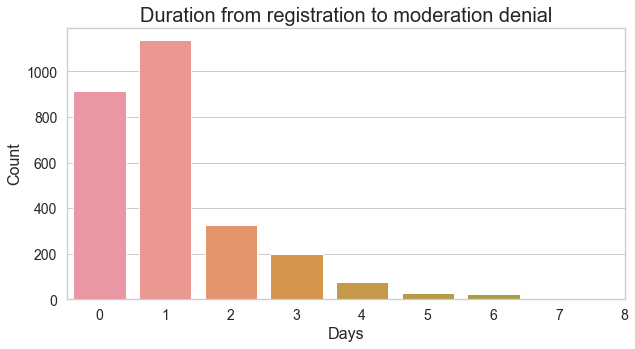

In [41]:
# chart of duration between registration and rejection (in days)
sns.countplot(x='denial_days', data=mod_denial)
plt.title('Duration from registration to moderation denial', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-0.5, 8);

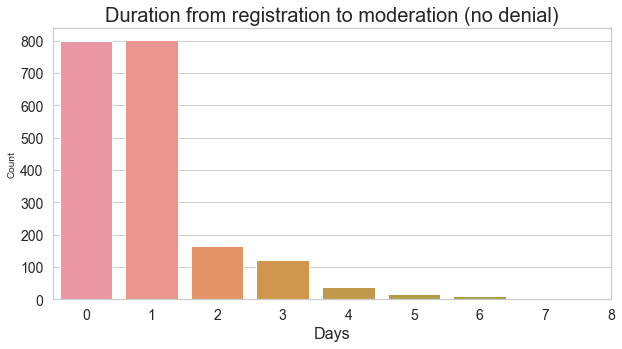

In [42]:
# chart of duration between registration and moderation (in days)
sns.countplot(x='moderation_days', data=mod_data)
plt.title('Duration from registration to moderation (no denial)', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-0.5, 8);

In [43]:
# filter out outliers in the duration between registration and moderation
mod_denial = mod_denial.query('denial_days <= 7')
mod_data = mod_data.query('moderation_days <= 7')

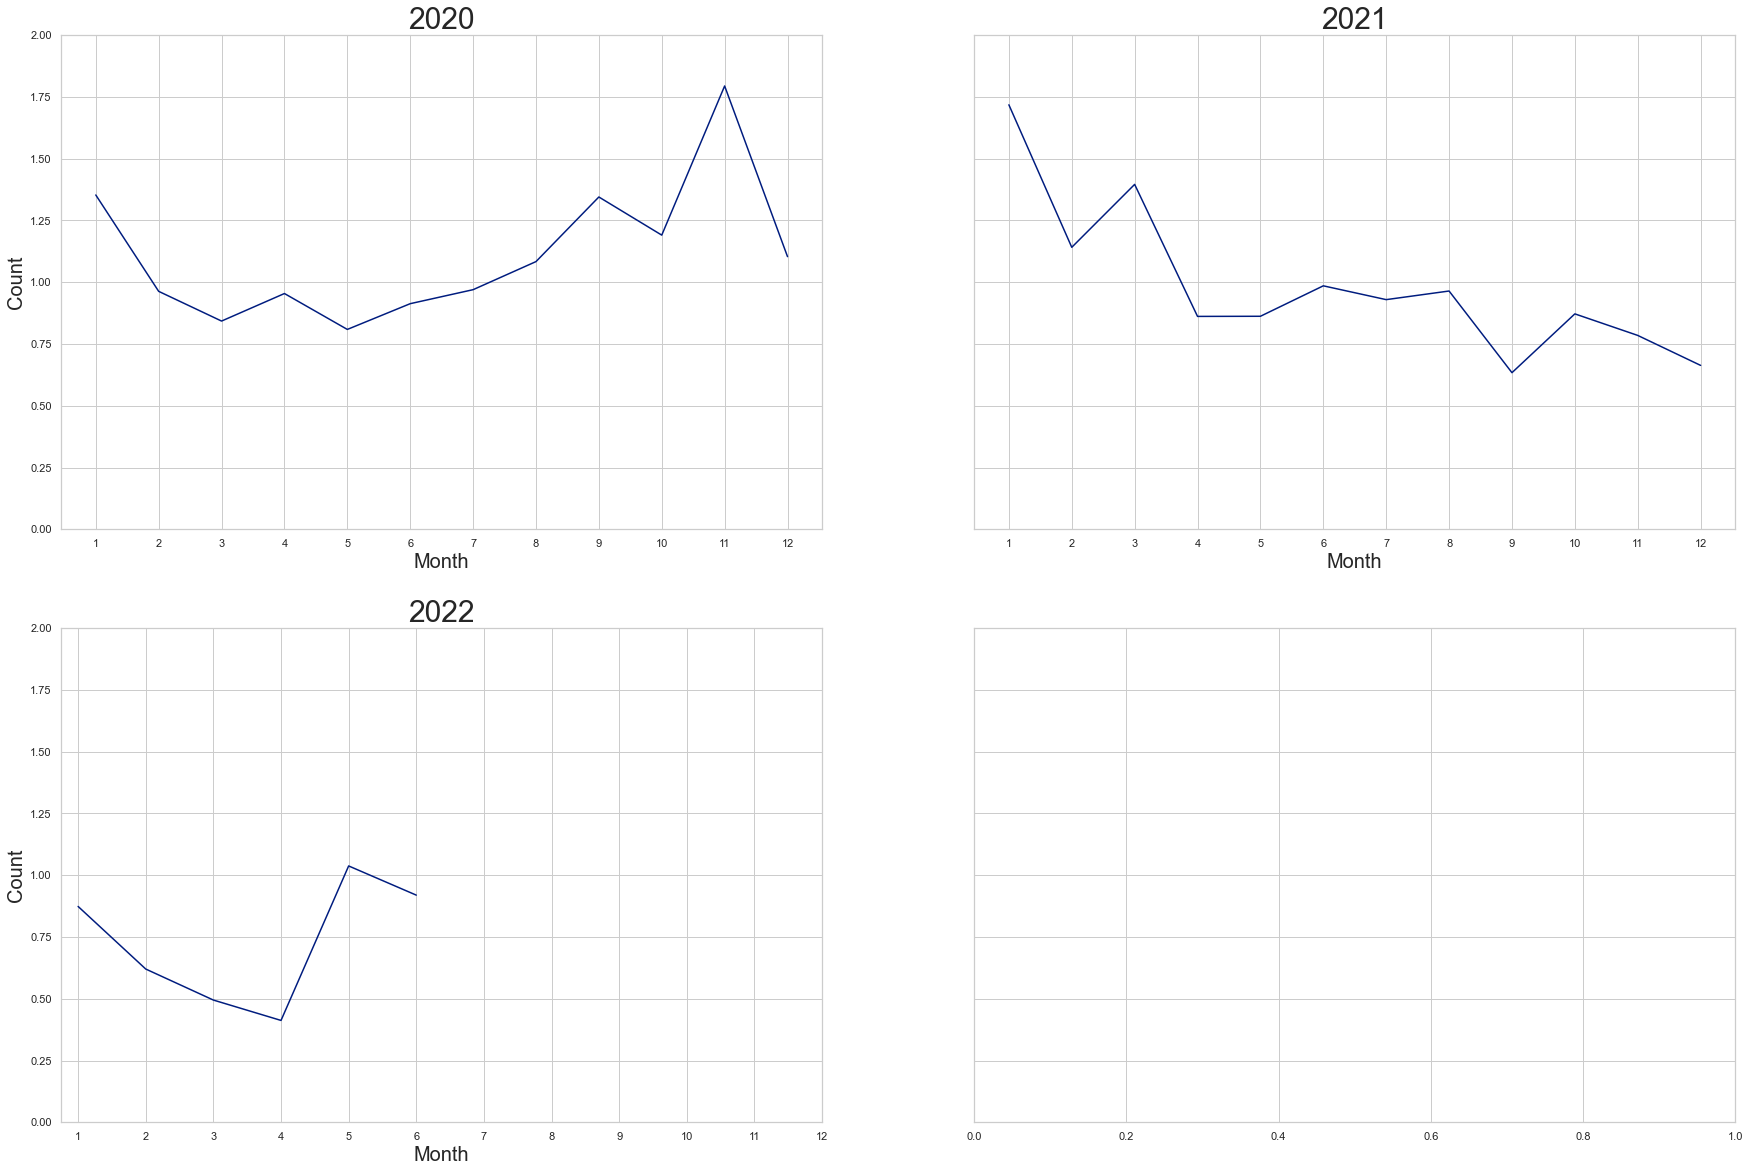

In [44]:
# chart of the dynamics of the average duration of moderation (without rejection) 
# after creating an account
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 20), sharey=True)
plt.ylim(0, 2)
years = [2020, 2021, 2022]
for year, ax in zip(years, axs.ravel()):
    mod_data[mod_data['year_created'] == year].pivot_table(
        index='month_created', values='moderation_days', aggfunc='mean').plot(ax=ax, legend=None)
    ax.set_title(year, fontsize=30)
    ax.set_xlabel('Month', fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.set_xticks(np.arange(1,13,1));

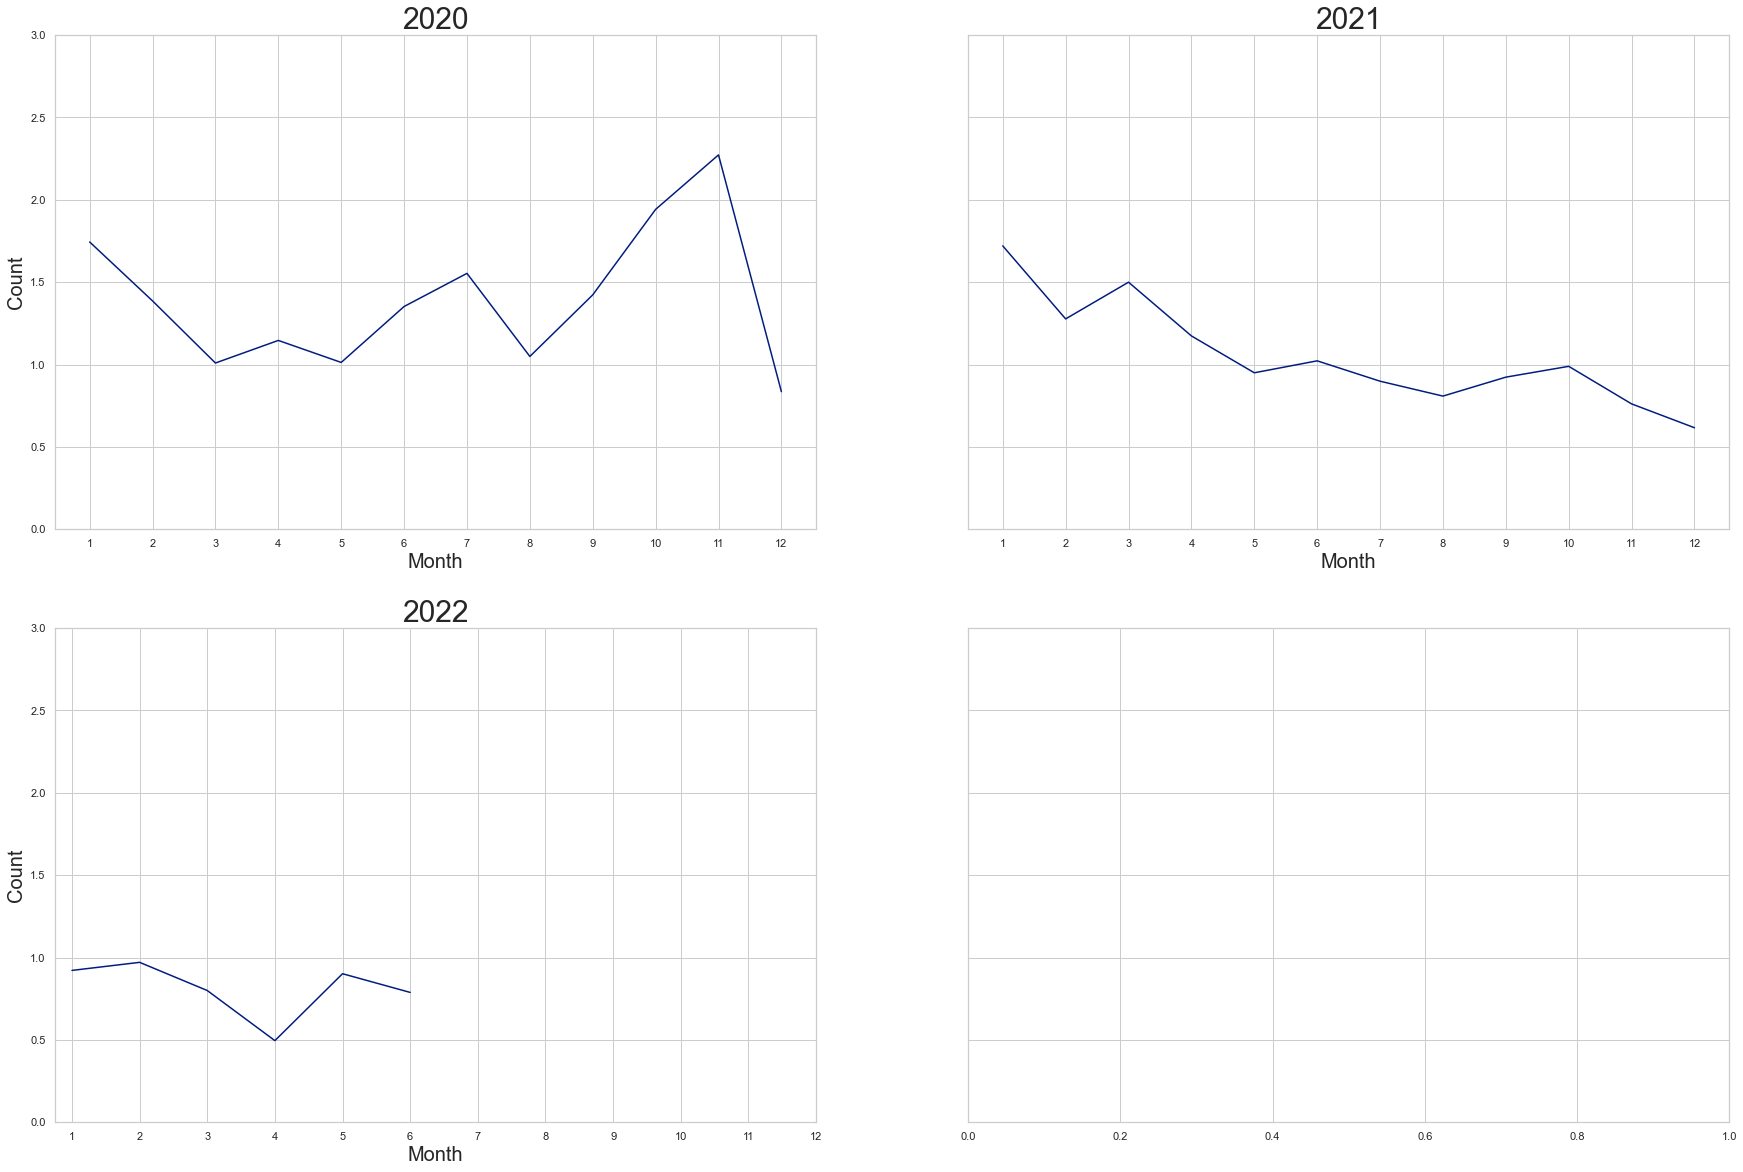

In [45]:
# chart of the dynamics of the duration of registration-rejection after creating an account
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 20), sharey=True)
plt.ylim(0, 3)
years = [2020, 2021, 2022]
for year, ax in zip(years, axs.ravel()):
    mod_denial[mod_denial['year_created'] == year].pivot_table(
        index='month_created', values='denial_days', aggfunc='mean').plot(ax=ax, legend=None)
    ax.set_title(year, fontsize=30)
    ax.set_xlabel('Month', fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.set_xticks(np.arange(1,13,1));

*Conclusions:*
- according to the duration of moderation graph, it almost never exceeds a week during the entire analyzed period, most often 0-2 days;
- according to the graphs of the average moderation duration by year/month for the period of 2020-2022, the longest duration was at the end of 2020 (about 1.5 days), then there is a decrease in moderation time (less than a day by the beginning of 2022);
- the duration from registration to moderation refusal takes slightly more time (visually, according to the barplot data), but also fits within a week, however, the average indicator - 1.36 is less than for moderation without refusal - 1.63;
- the graphs of the registration - refusal in moderation dynamics also show a decrease in time for the analyzed period.

Next, we will calculate the time from rejection to moderation as a complex indicator, which consists of the reaction rate of the volunteer to rejection and the speed of moderation itself (only for those users who are moderated after rejection).

In [46]:
# moderation after rejection rows
denial_moderation = data_moderation.dropna(subset=['date_moderation', 'date_moderationdenial']).query('date_moderation > date_moderationdenial')

In [47]:
# days calculation
denial_moderation['moderation_days'] = (denial_moderation['date_moderation'] - denial_moderation['date_moderationdenial']).dt.days.astype('int')
denial_moderation.sample(3, random_state=666)

,date_created,date_moderation,date_moderationdenial,status,month_created,year_created,moderation_days
5050,2021-11-01,2021-11-12,2021-11-02,промодерирован,11,2021,10
4156,2021-06-30,2021-11-23,2021-06-30,промодерирован,6,2021,146
4644,2021-09-08,2021-09-20,2021-09-09,промодерирован,9,2021,11


In [48]:
# statistics
denial_moderation['moderation_days'].describe().to_frame()

,moderation_days
count,245.00
mean,58.51
std,123.07
min,1.00
25%,1.00
50%,7.00
75%,53.00
max,787.00


It takes more time to moderate after rejection: the mean duration is 58 days. There are some outliers.

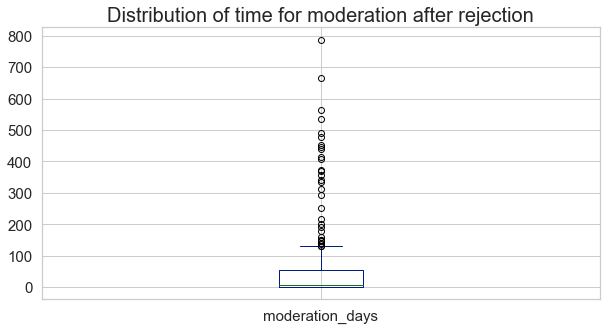

In [49]:
# rejection - moderation chart (days)
denial_moderation['moderation_days'].plot(kind='box', fontsize=15)
plt.title('Distribution of time for moderation after rejection', fontsize=20);

In [50]:
# filter out outliers according to the rule 1.5IQR
denial_moderation = denial_moderation.query('moderation_days <= 1.5*53')
denial_moderation['moderation_days'].describe().to_frame()

,moderation_days
count,200.00
mean,13.04
std,19.41
min,1.00
25%,1.00
50%,4.00
75%,14.00
max,79.00


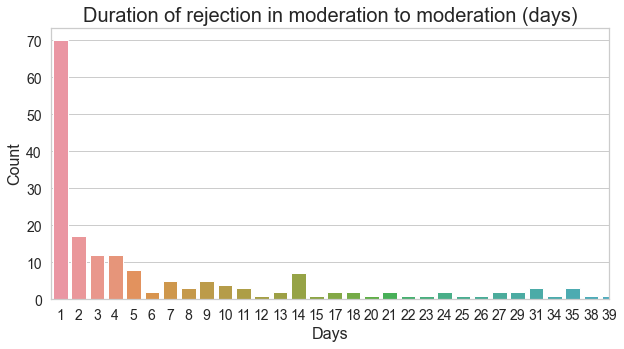

In [51]:
# the chart of the duration of rejection in moderation to moderation (days).
sns.countplot(x='moderation_days', data=denial_moderation)
plt.title('Duration of rejection in moderation to moderation (days)', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-0.5, 30);

The majority of users pass the second moderation within a day, but there are some users who are moderated for up to two weeks and, rarely, even longer.

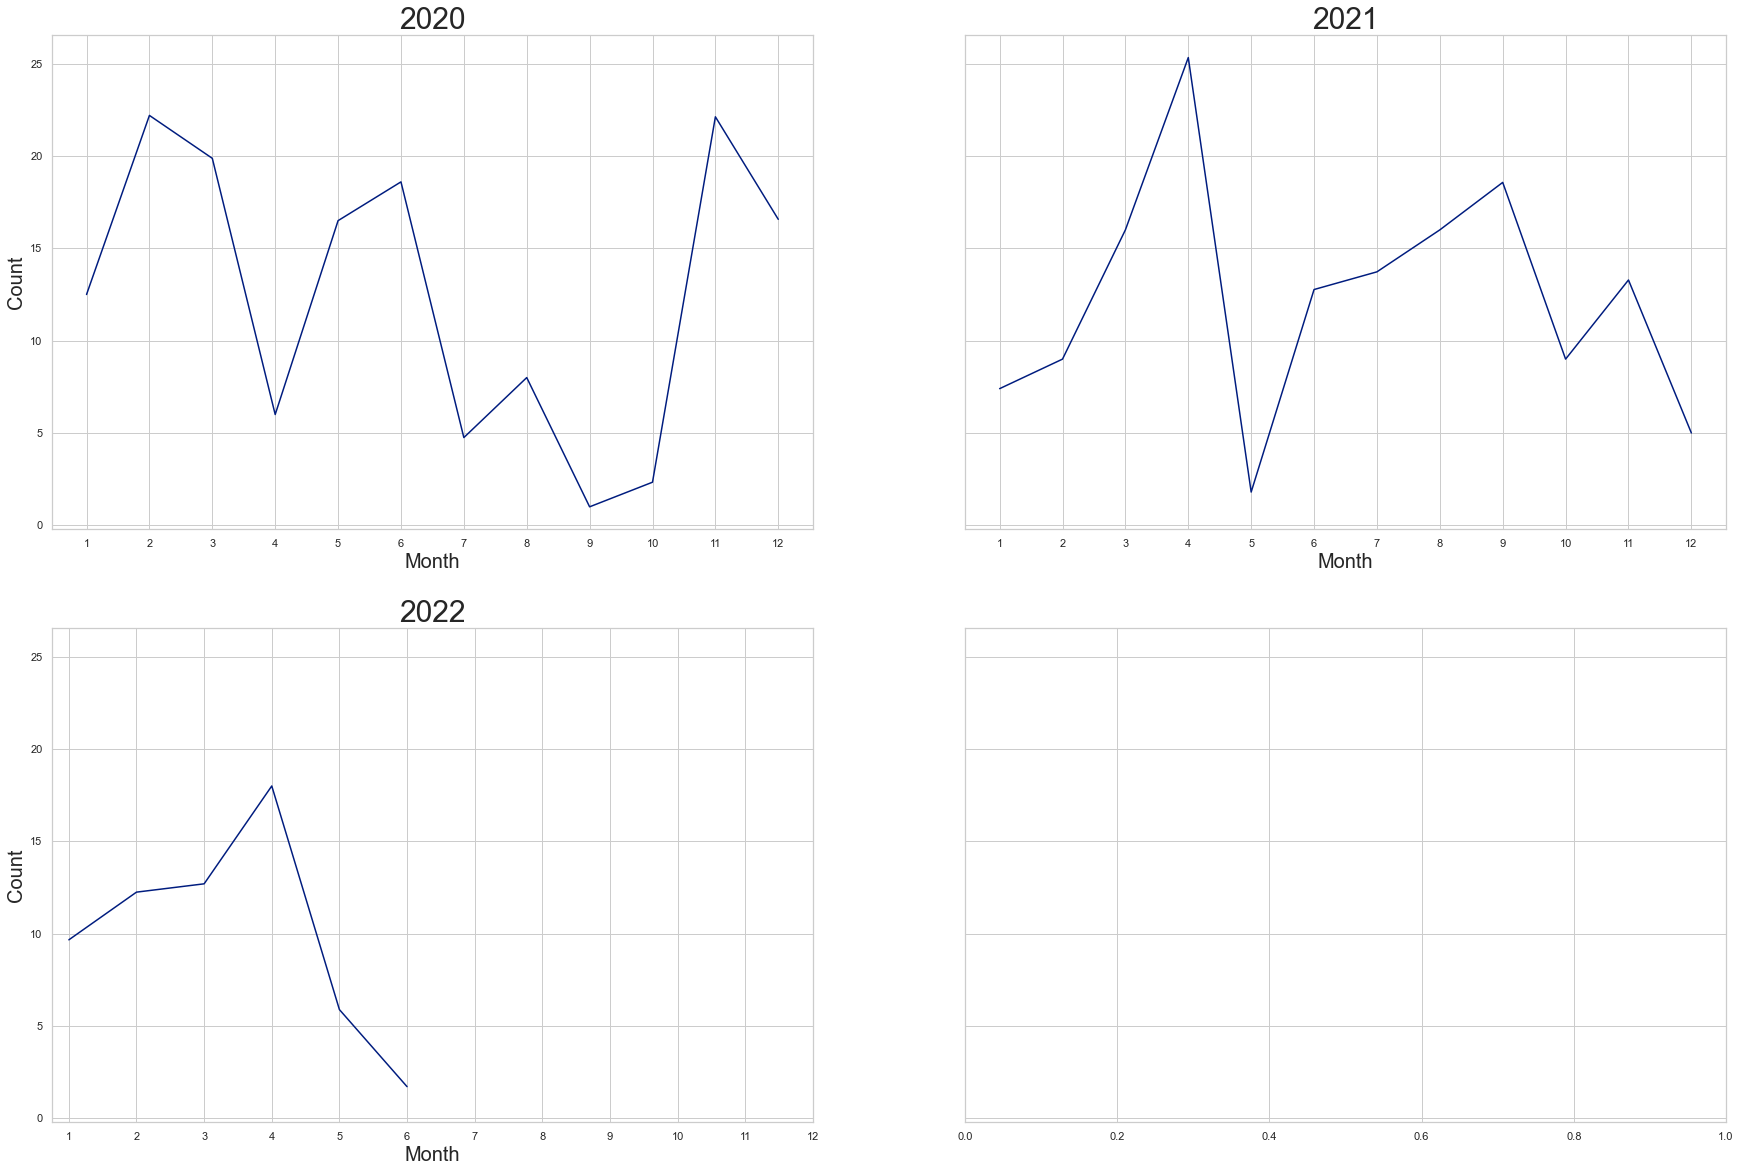

In [52]:
# moderation dynamics after rejection
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 20), sharey=True)
years = [2020, 2021, 2022]
for year, ax in zip(years, axs.ravel()):
    denial_moderation[denial_moderation['year_created'] == year].pivot_table(
        index='month_created', values='moderation_days', aggfunc='mean').plot(ax=ax, legend=None)
    ax.set_title(year, fontsize=30)
    ax.set_xlabel('Month', fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.set_xticks(np.arange(1,13,1));

Based on the graph, there is no clear trend in users returning to moderation.

## Conversion from registration to moderation and response (funnel in dynamics)

We will build a conversion funnel using the interactive library Plotly. To assess the dynamics, we will divide the data by years - 2020-2022. We will analyze only 40.4% of the original dataset due to missing data on moderation and response dates.

We will also filter out records where the moderation date is later than the date of the first response.

In [53]:
# rows with the incorrect date order
to_filter = volunteers.query('date_moderation > date_firstrespond').index
len(to_filter)

470

In [54]:
# data filtering
funnel_data = volunteers.drop(to_filter)
len(funnel_data)
funnel_data.sample(3, random_state=456)

,category,city,date_birthday,date_created,date_firstrespond,date_firsttask,date_lastrespond,date_lasttask,date_lastvisit,date_moderation,date_moderationdenial,email_digest,email_newtasks,status,bonuses,id_company,id_volunteer,number_responds,number_reviews,number_tasks,month_created,year_created,month_moderation,year_moderation
4960,NaN,NaN,NaT,2021-10-20 05:26:59,NaT,NaT,NaT,NaT,2021-10-21,NaT,NaT,True,True,новый,0,0,40803,0,0,0,10,2021,NaN,NaN
2353,"переводы,обучение и тренинги,",москва,NaT,2020-05-22 03:13:10,2020-08-18,NaT,2020-08-25,NaT,2020-09-11,2020-05-22,NaT,True,True,промодерирован,0,0,18652,2,0,0,5,2020,5.00,"2,020.00"
7346,"дизайн и верстка,",ярославль,2001-12-13,2022-06-15 07:18:48,NaT,NaT,NaT,NaT,2022-06-16,NaT,2022-06-16,True,False,не прошел модерацию,0,0,102286,0,0,0,6,2022,NaN,NaN


In [55]:
# create a dictionary with using the dataframes where a key is a year of analysis and a value is a dataframe
d = {}
for year in np.arange(2020, 2023):
    data = funnel_data[funnel_data['year_created'] == year]
    values = [['registration', data['date_created'].count()], 
              ['moderation', data['date_moderation'].count()], 
              ['respond', data['date_firstrespond'].count()]]
    d.update({year:pd.DataFrame(values, columns = ['step', 'number'])})
# make subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=(2020, 2021, 2022))
# conversion funnels
fig.add_trace(
    go.Funnel(
    y = d[2020]['step'],
    x = d[2020]['number'],
    textposition = "inside",
    textinfo = "value+percent previous",
        marker = {"color": "#023047"}
),
    row=1, col=1
    )
fig.add_trace(
    go.Funnel(
    y = d[2021]['step'],
    x = d[2021]['number'],
    textposition = "inside",
    textinfo = "value+percent previous",
        marker = {"color": "#ffb703"}
),
    row=1, col=2
    )
fig.add_trace(
    go.Funnel(
    y = d[2022]['step'],
    x = d[2022]['number'],
    textposition = "inside",
    textinfo = "value+percent previous",
        marker = {"color": "#fb8500"}
),
    row=2, col=1
    )
fig.update_layout(showlegend=False,height=600, width=1000)
fig.show()

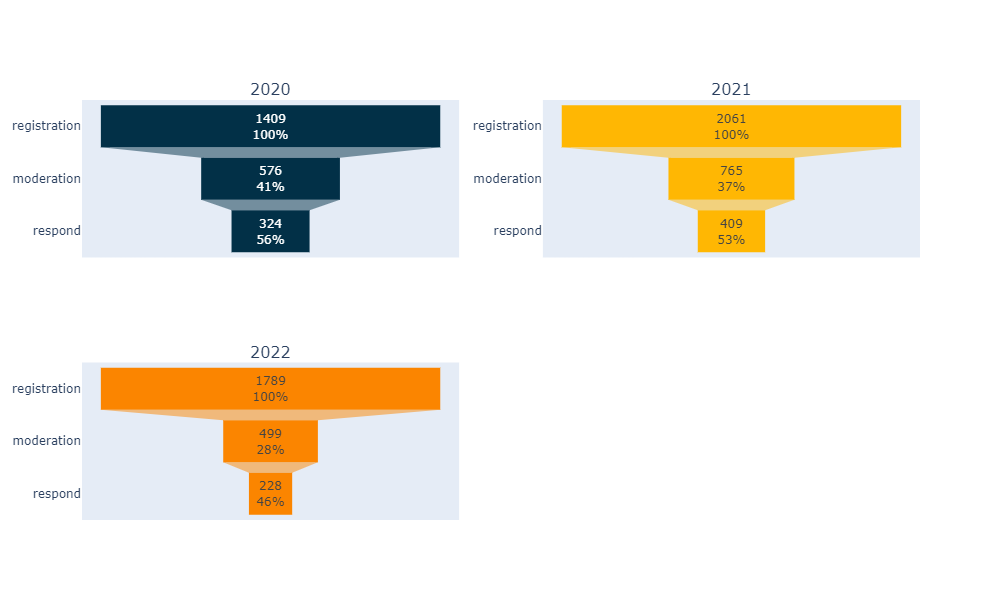

According to the data from the moderation funnel, less than 50% of registered users pass moderation, and the conversion rate to moderation has a negative trend. The trend in responses is also negative (dropping from 56% in 2020 to 53% in 2021, with incomplete data for 2022). The number of registrations during this period has a positive trend, with 86% of the 2021 figures registered in the first half of 2022.

## Retention rate. Activity dynamics.

Let's create user profiles that contain: user ID, date of first response (based on this column, we form cohorts as a user activity indicator), and month of response.

In [56]:
profiles = volunteers[['id_volunteer', 'date_firstrespond']].dropna()
profiles['dt'] = profiles['date_firstrespond'].dt.date
profiles['month'] = profiles['date_firstrespond'].astype('datetime64[M]')
profiles.sample(5)

,id_volunteer,date_firstrespond,dt,month
1797,14164,2020-03-12,2020-03-12,2020-03-01
2260,17698,2020-05-29,2020-05-29,2020-05-01
3654,30935,2022-02-01,2022-02-01,2022-02-01
2631,21369,2020-07-23,2020-07-23,2020-07-01
2995,25410,2020-12-16,2020-12-16,2020-12-01


We will take the data from the "statistics" table as events and consider events from this dataframe as user sessions, i.e., a user's activity. We will calculate retention by months due to the analysis over a long period of time - 2020 - 2022.

Next, we will use a customized function to calculate the retention coefficient.

In [57]:
def get_retention(profiles, sessions, observation_date, horizon_months, ignore_horizon=False):
    '''The function that takes user profiles, session data, the analysis date, and the analysis horizon (in months) as inputs. 
    It returns the retention table and raw data:.'''
    # exclude users who did not "survive" until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - relativedelta(
            months=horizon_months)
    result_raw = profiles.query('month <= @last_suitable_acquisition_date')
    # collect raw data to calculate retention
    result_raw = result_raw.merge(
        sessions[['id_volunteer', 'date']], on='id_volunteer', how='left'
    )
    # filter out negative lifetime
    result_raw = result_raw.query('date >= date_firstrespond')
    # lifetime calculation
    result_raw['lifetime'] = result_raw.apply(lambda x: relativedelta(x['date'], x['date_firstrespond']).months, axis=1)
    # rr calculation
    result_grouped = result_raw.pivot_table(
        index=['month'], columns='lifetime', values='id_volunteer', aggfunc='nunique'
    )
    # cohort size calculation
    cohort_sizes = (result_raw.groupby('month')
                    .agg({'id_volunteer': 'count'})
                    .rename(columns={'id_volunteer': 'cohort_size'})
    )
    # join main data and cohorts
    result_grouped = cohort_sizes.merge(result_grouped, on='month', how='left').fillna(0)
    # retention calculation
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)
    # exclude all lifetimes that exceed the analysis horizon
    result_grouped = result_grouped[['cohort_size'] + list(range(horizon_months))]
    # restore the column with the cohort sizes
    result_grouped['cohort_size'] = cohort_sizes
    # return the retention table and raw data
    # raw data will come in handy if you need to find an error in the calculations.
    return result_raw, result_grouped

Let's set the analysis date to June 1, 2022, and the horizon to 6 months. The analysis will be carried out for users who managed to "survive" on the platform for six months.

In [58]:
# apply our function
result_raw, result_grouped = get_retention(profiles, statistics, observation_date=datetime(2022, 6, 1).date(), horizon_months=6)

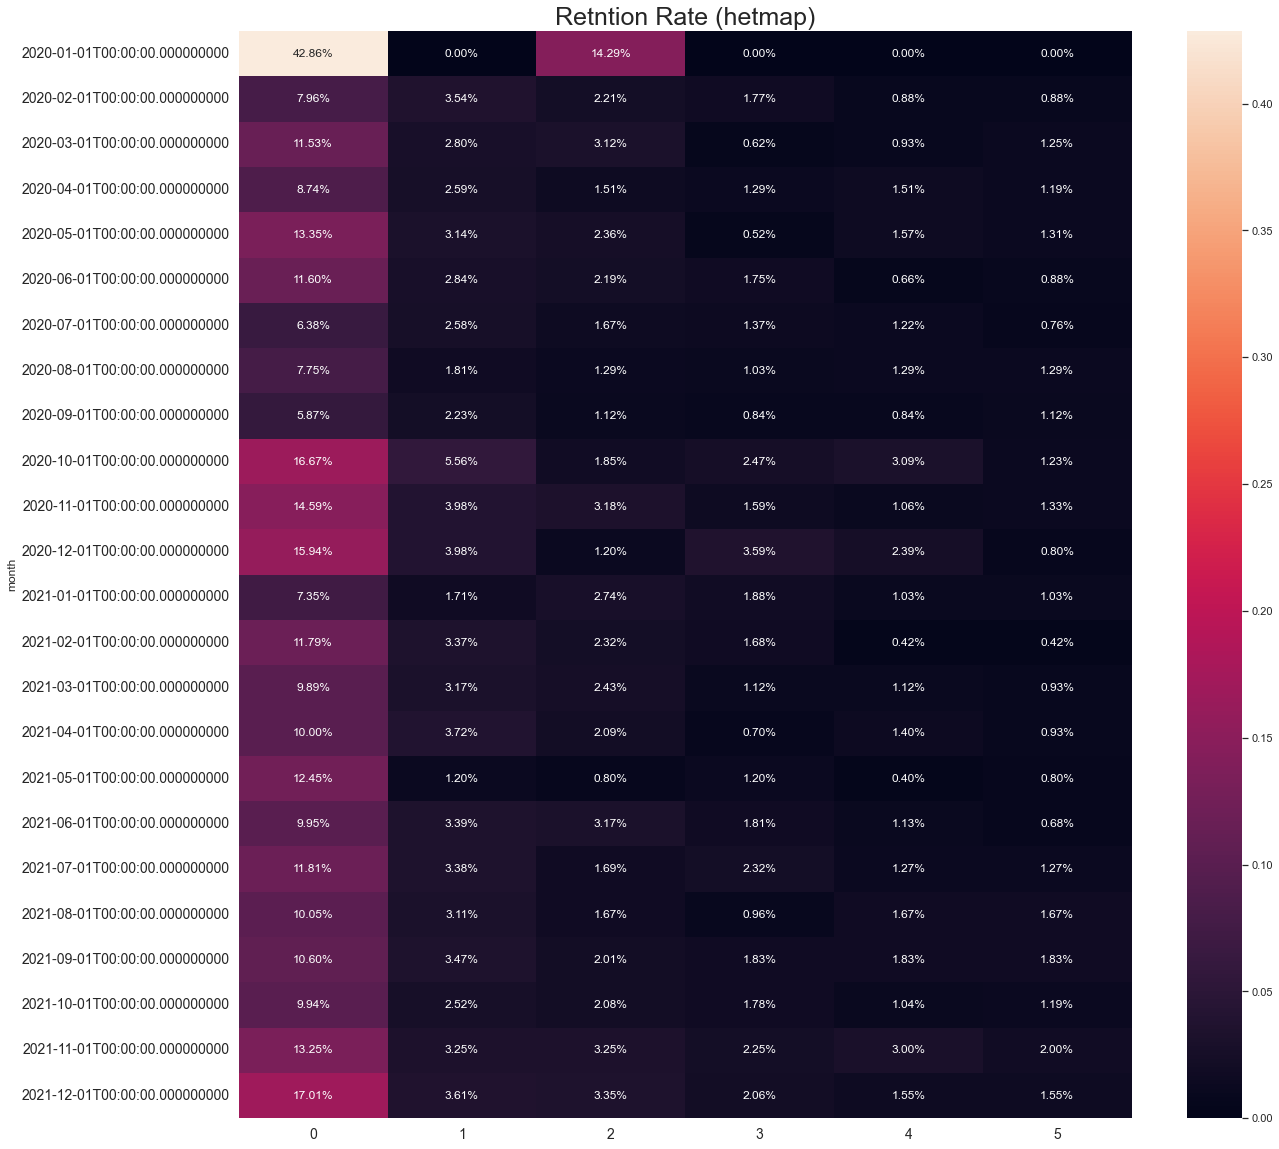

In [59]:
# rr heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(result_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Retntion Rate (hetmap)', fontsize=25)  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

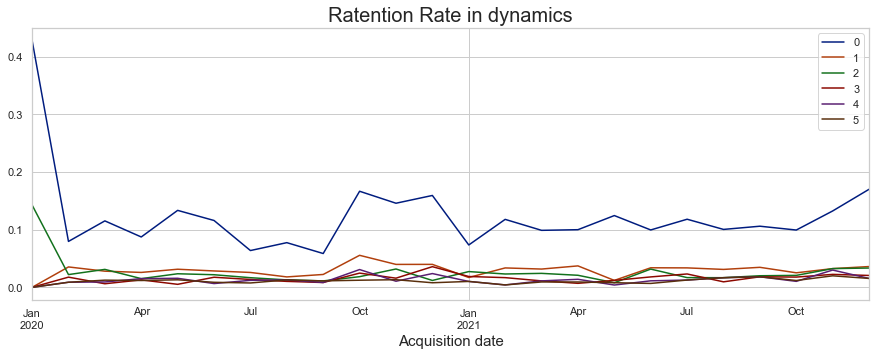

In [60]:
# rr dynamics
report = result_grouped.drop(columns=['cohort_size'])
report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Acquisition date', fontsize=15)
plt.title('Ratention Rate in dynamics', fontsize=20)
plt.show()

The retention analysis was conducted for users who first responded between December 2019 and December 2021.

*Conclusions:*

- There is a positive trend in the retention of the first month - up to 17%.
- The best retention for the first month was shown in the period of October-December 2020 - 14.5-16.6%, and in December 2021 (17%).
- From the second month, user retention drops sharply for all cohorts - not more than 5%, and there is no clear trend over the analyzed period.

## Analysis of the time between registration and the first response by the volunteer.

77.5% of the records have missing values in the date of the first response column. The analysis is based on the filled 22.5% of the dataset.

In [61]:
# delete NaN in responds
data_res = volunteers.dropna(subset=['date_firstrespond'])

In [62]:
# select the registration date and the date of the first respond
data_res['date_created'] = data_res['date_created'].dt.date
data_res['date_firstrespond'] = data_res['date_firstrespond'].dt.date

In [63]:
# checking for incorrect values: the response date is always later than the registration date
len(data_res.query('date_firstrespond < date_created'))

0

In [64]:
# calculating the duration between registration and response (in days), and converting it to int64 type
data_res['respond_days'] = (data_res['date_firstrespond'] - data_res['date_created'])
data_res['respond_days'] = data_res['respond_days'].dt.days.astype('int16')

In [65]:
# statistics
data_res['respond_days'].describe().to_frame()

,respond_days
count,"1,431.00"
mean,21.70
std,71.60
min,0.00
25%,0.00
50%,0.00
75%,6.00
max,787.00


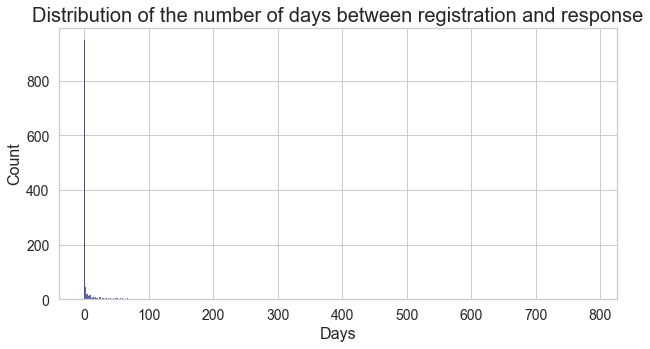

In [66]:
# duration between registration and response
sns.histplot(x='respond_days', data=data_res)
plt.title('Distribution of the number of days between registration and response', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

There are outliers in the data. According to the graph and table, most often it takes no more than a month between registration and response. Let's filter the records according to this value.

In [67]:
# outliers ratio
print('Outliers ratio: {:.0f}%'.format(
    (len(data_res.query('respond_days > 31'))/data_res.shape[0])*100))

Outliers ratio: 14%


In [68]:
# filtering
data_res = data_res.query('respond_days <= 31')

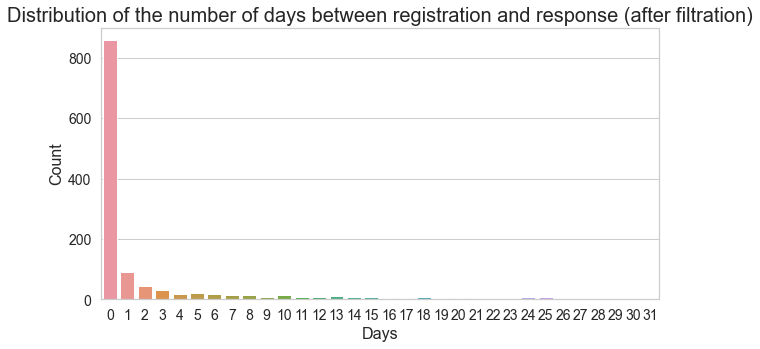

In [69]:
# duration between registration and response (filtered)
sns.countplot(x='respond_days', data=data_res)
plt.title('Distribution of the number of days between registration and response (after filtration)', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

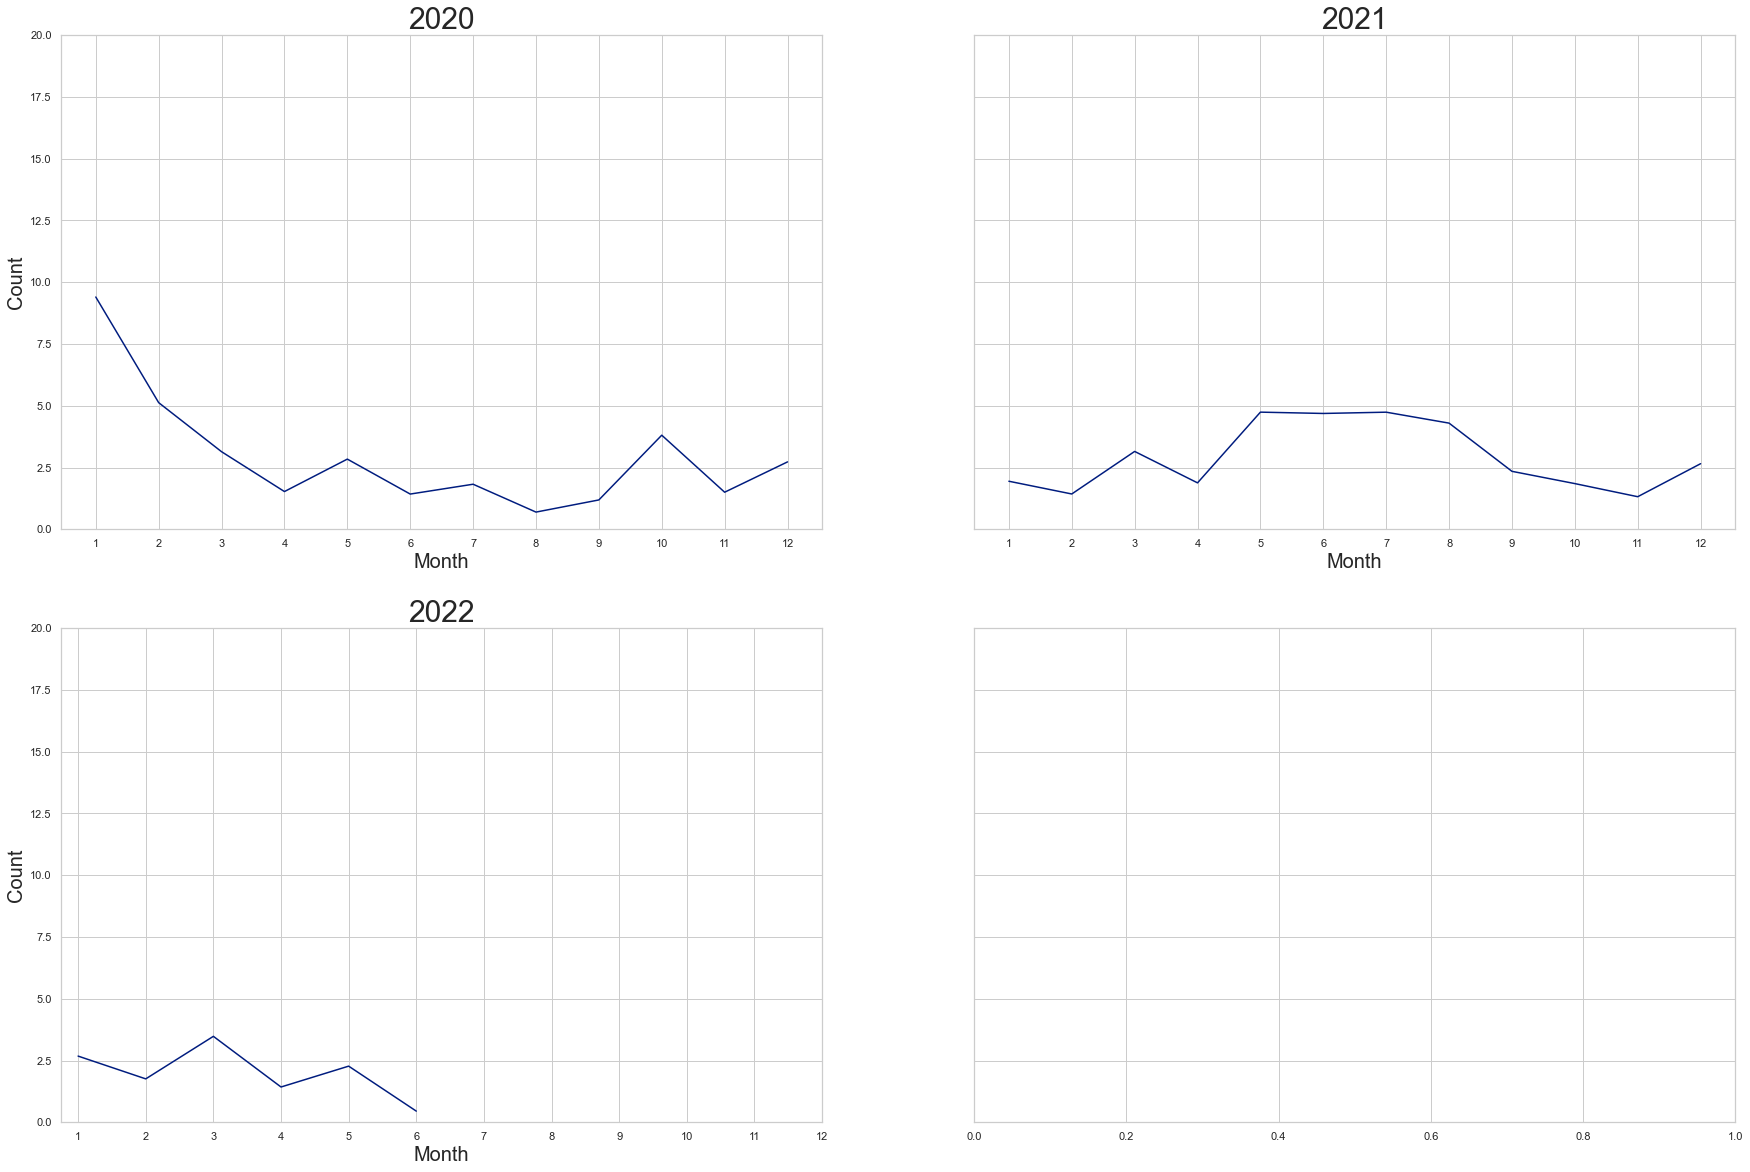

In [70]:
# duration between registration and response in dynamics
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 20), sharey=True)
plt.ylim(0, 20)
years = [2020, 2021, 2022]
for year, ax in zip(years, axs.ravel()):
    data_res[data_res['year_created'] == year].pivot_table(
        index='month_created', values='respond_days', aggfunc='mean').plot(ax=ax, legend=None)
    ax.set_title(year, fontsize=30)
    ax.set_xlabel('Month', fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.set_xticks(np.arange(1,13,1));

*Conclusions:*

- It usually takes a couple of days between registration and the first response, which suggests that users who respond are registering with the goal of completing requests.
- The average response time was highest at the end of 2019 and the beginning of 2020 - around 10 days, and then stabilized at around 2.5 days (except for the period of April-September 2021 - 5 days).
- It's important to note that over 75% of registered users do not have data on their first response.

## The relationship between a volunteer's choice to be an executor, their registration date, and the number of completed tasks.

 To find the relationship, we will separate volunteer-executors into a separate variable (data taken from the "statistics" dataframe). From the "volunteers" table, we will obtain data on their registration date and merge the two tables into one. Then we will select the most active volunteers and analyze their registration dates in relation to the original dataset.

In [71]:
# registration date to date type
volunteers['date_created'] = volunteers['date_created'].dt.date

In [72]:
# extracting the volunteer-executors into a separate variable
stat_filtered = (statistics[['id_volunteer', 'status']]
 .query('status == "выбран исполнитель"')
 .merge(volunteers[['id_volunteer', 'date_created', 'month_created', 'year_created']], on='id_volunteer', how='inner'))
stat_filtered

,id_volunteer,status,date_created,month_created,year_created
0,12629,выбран исполнитель,2020-01-20,1,2020
1,13174,выбран исполнитель,2020-02-06,2,2020
2,13174,выбран исполнитель,2020-02-06,2,2020
3,13174,выбран исполнитель,2020-02-06,2,2020
4,13174,выбран исполнитель,2020-02-06,2,2020
...,...,...,...,...,...
2956,101687,выбран исполнитель,2022-06-09,6,2022
2957,51012,выбран исполнитель,2022-04-28,4,2022
2958,102437,выбран исполнитель,2022-06-17,6,2022
2959,102541,выбран исполнитель,2022-06-20,6,2022


In [73]:
# the most frequent executors (volunteer IDs)
top20 = stat_filtered['id_volunteer'].value_counts().head(20).to_frame()
top20

,id_volunteer
23189,66
21390,60
27739,53
22183,48
31281,33
14920,31
14359,29
41572,29
40887,29
33273,28


In [74]:
# executors data
(stat_filtered.query('id_volunteer in @top20.index.values.tolist()')
 .groupby('date_created').agg({'id_volunteer':'count'})
 .sort_values(by='id_volunteer', ascending=False))

,id_volunteer
date_created,
2020-09-10,66
2020-07-23,60
2021-01-12,53
2020-08-13,48
2021-03-23,33
2020-03-20,31
2021-11-02,29
2021-10-21,29
2020-03-09,29


In the table above, "id_volunteer" is not the volunteer's identifier, but the number of times they were chosen as an executor.

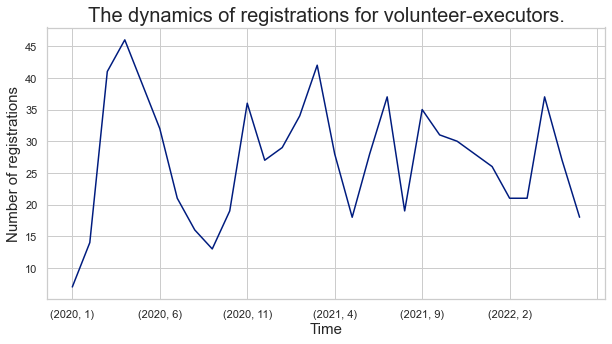

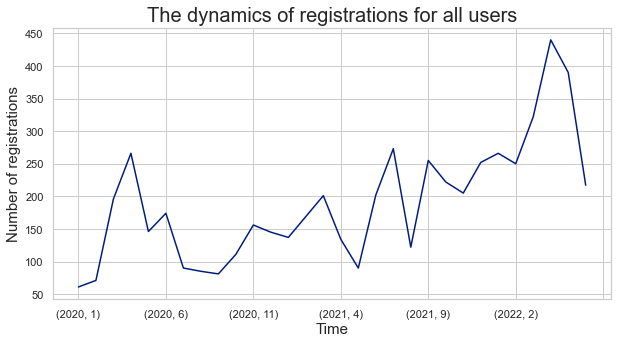

In [75]:
# registration dynamics comparison
stat_filtered.pivot_table(index=['year_created', 'month_created'], values='id_volunteer', aggfunc='nunique' ).plot(legend=None)
plt.title('The dynamics of registrations for volunteer-executors.', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of registrations', fontsize=15)
volunteers.pivot_table(index=['year_created', 'month_created'], values='id_volunteer', aggfunc='count').plot(legend=None)
plt.title('The dynamics of registrations for all users', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of registrations', fontsize=15);

Among the most frequent volunteer-executors, users who registered in 2020 and 2021 rarely appear equally. The dynamics of registrations do not show visible differences between the entire dataset and the executors.

It's possible that the volunteer-executors were the most active and submitted a large number of requests, which is why they were chosen more often. In addition, long-registered users understandably completed more tasks than newcomers.

Let's check this by outputting the IDs of the volunteers who submitted the highest number of requests (filtering the records of the "statistics" dataframe by the "request" status). We will also output the IDs of users with the highest number of responses (number_responds from the "volunteers" dataframe) and completed tasks (number_tasks from the "volunteers" dataframe).

In [76]:
# IDs of the volunteers who submitted the highest number of requests
appl = statistics[['id_volunteer', 'status']].query('status == "заявка"')
appl.groupby('id_volunteer').count().sort_values(by='status', ascending=False).head(10)

,status
id_volunteer,
9642,119
3796,69
5949,59
1777,53
6178,50
6942,45
15062,43
13174,41
30609,38


In [77]:
# IDs of the users with the highest number of responses
volunteers[['number_responds', 'id_volunteer']].sort_values(by='number_responds', ascending=False).head(10)

,number_responds,id_volunteer
2699,85,22183
2774,83,23189
2633,83,21390
1917,72,15062
3598,69,30609
1733,66,13174
4514,66,37489
3275,64,27739
5059,58,41572
2597,57,20859


In [78]:
# IDs of the users with the highest number of completed tasks
volunteers[['number_tasks', 'id_volunteer']].sort_values(by='number_tasks', ascending=False).head(10)

,number_tasks,id_volunteer
2774,65,23189
2633,57,21390
3275,52,27739
2699,44,22183
1831,28,14359
4988,28,40887
3489,26,29738
3699,26,31281
4944,25,40673
2056,25,16069


As expected, popular volunteer-executors not only submitted the highest number of requests and made the most responses but also completed the highest number of tasks.

Next, we will try to establish a relationship in the following way: *for each task, we will check how often the user with the earliest registration date became the executor among all those who applied for that task.*

In [79]:
# let's filter the events with the "request" and "executor selection" statuses, and for each volunteer, 
# we will attach the registration date from the "volunteers" dataframe.
requests = statistics.query('status == "первая заявка" | status == "заявка" | status == "выбран исполнитель"')
requests = requests.drop(columns = ['id_category', 'date', 'id'])
requests = requests.merge(volunteers[['date_created', 'id_volunteer']], on='id_volunteer', how='left')
requests = requests.dropna()
requests.head(10)

,status,id_task,id_volunteer,date_created
44,заявка,12492,12456,2020-01-13
168,заявка,12873,12629,2020-01-20
196,первая заявка,12508,12982,2020-01-30
200,первая заявка,12972,12629,2020-01-20
201,заявка,12920,12629,2020-01-20
202,выбран исполнитель,12972,12629,2020-01-20
257,заявка,13093,13165,2020-02-06
275,заявка,13085,13174,2020-02-06
276,выбран исполнитель,13085,13174,2020-02-06
280,первая заявка,12993,13213,2020-02-07


In [80]:
# we will keep only the IDs of the tasks that had competition - 
# i.e. more than one request was submitted
to_filter = requests.groupby('id_task').count()
to_filter = to_filter.query('status > 2')
to_filter.head(10)

,status,id_volunteer,date_created
id_task,,,
12951,4,4,4
12995,3,3,3
13256,3,3,3
13541,3,3,3
13640,3,3,3
13930,4,4,4
14138,3,3,3
14142,3,3,3
14273,4,4,4


In [81]:
# let's filter the tasks in the original dataframe
requests = requests[requests['id_task'].isin(to_filter.index)]
requests.sort_values(by='id_task', ascending=False).head(10)

,status,id_task,id_volunteer,date_created
13803,заявка,102555,30776,2021-03-13
13801,заявка,102555,22183,2020-08-13
13800,первая заявка,102555,52315,2022-05-15
13766,первая заявка,102418,102404,2022-06-17
13770,заявка,102418,52045,2022-05-12
13772,заявка,102418,101410,2022-06-06
13775,выбран исполнитель,102418,52045,2022-05-12
13763,заявка,102397,101667,2022-06-09
13754,первая заявка,102397,99609,2022-05-17
13757,заявка,102397,40690,2021-10-18


In [82]:
# for each task, let's output the earliest registration date of the volunteer among all who applied
min_max = requests.groupby('id_task').agg({'date_created':'min'}).reset_index()
min_max.rename(columns={'date_created':'min_date'}, inplace=True)
min_max.head()

,id_task,min_date
0,12951,2020-02-25
1,12995,2020-03-21
2,13256,2020-01-31
3,13541,2020-01-25
4,13640,2020-06-27


In [83]:
# let's join the minimum date to the main table and keep only the events where the executor was selected
requests = requests.merge(min_max, on='id_task', how='left')
result_date = requests.query('status == "выбран исполнитель"')
result_date = result_date.drop_duplicates()
print(result_date.shape)
result_date.sort_values(by='id_task').head(10)

(1202, 5)


,status,id_task,id_volunteer,date_created,min_date
151,выбран исполнитель,12951,17041,2020-04-26,2020-02-25
823,выбран исполнитель,12995,14969,2020-03-21,2020-03-21
2,выбран исполнитель,13256,13307,2020-02-12,2020-01-31
5,выбран исполнитель,13541,12807,2020-01-25,2020-01-25
403,выбран исполнитель,13640,20392,2020-06-27,2020-06-27
11,выбран исполнитель,13930,14225,2020-03-03,2020-03-03
24,выбран исполнитель,13930,14964,2020-03-21,2020-03-03
10,выбран исполнитель,14138,13174,2020-02-06,2020-02-06
13,выбран исполнитель,14273,14294,2020-03-05,2020-02-12
15,выбран исполнитель,14273,13307,2020-02-12,2020-02-12


In [84]:
# let's count the number of cases where the registration date of the executor is equal 
# to the earliest registration date among all participants
(result_date['date_created'] == result_date['min_date']).sum()

648

*Conclusion:* in more than half of the cases (53%), the registration date of the executor is the earliest among all users who submitted requests to complete the task.

Next, we will check how often a volunteer who submitted the first request becomes the executor. For some tasks in the data, there are two records with the "first request" status. For such cases, we will select the record with the earliest date.

In [85]:
first = statistics[['id_task', 'id_volunteer', 'date', 'status']].query('status == "первая заявка"')
first = first.sort_values(by=['id_task', 'date']).groupby('id_task').agg({'date':'first'}).reset_index()
first.head()

,id_task,date
0,9139,2020-01-14 16:36:44
1,9367,2021-03-26 11:59:38
2,11226,2020-01-29 07:57:44
3,11277,2020-01-03 22:09:46
4,12237,2020-01-07 01:08:27


In [86]:
# let's filter the first requests based on the first date in the table above
first_req = statistics[['id_task', 'id_volunteer', 'date', 'status']].query('status == "первая заявка"').drop(columns='status')
first_req = first_req.merge(first['date'], on='date', how='inner')
first_req.rename(columns={'id_volunteer':'first_volunteer'}, inplace=True)
first_req.head()

,id_task,first_volunteer,date
0,11277,10065,2020-01-03 22:09:46
1,12333,8109,2020-01-06 09:56:52
2,12335,11905,2020-01-06 16:46:25
3,12237,12066,2020-01-07 01:08:27
4,12368,6178,2020-01-08 22:21:31


In [87]:
# let's join the IDs of the first volunteers with the executor table
result_date = result_date.merge(first_req[['first_volunteer', 'id_task']], on='id_task', how='left')

In [88]:
# let's compare the executor ID and the ID of the first volunteer
print(result_date.shape)
(result_date['id_volunteer'] == result_date['first_volunteer']).sum()

(1202, 6)


401

*Conclusion*: the volunteer who submitted the first request for the task becomes the executor only in 33% of cases.

At this stage, we will find out how often a volunteer with the highest number of completed tasks becomes an executor.

In [89]:
# join information about the number of completed tasks for each volunteer (from the volunteers table)
requests = requests.merge(volunteers[['id_volunteer', 'number_tasks']], on='id_volunteer', how='left')
requests.head(5)

,status,id_task,id_volunteer,date_created,min_date,number_tasks
0,первая заявка,13256,12989,2020-01-31,2020-01-31,0
1,заявка,13256,13307,2020-02-12,2020-01-31,4
2,выбран исполнитель,13256,13307,2020-02-12,2020-01-31,4
3,заявка,13541,12807,2020-01-25,2020-01-25,11
4,заявка,13541,13763,2020-02-21,2020-01-25,0


In [90]:
max_task = requests.groupby('id_task').agg({'number_tasks':'max'}).reset_index()
max_task.rename(columns={'number_tasks':'max_tasks'}, inplace=True)
max_task.head()

,id_task,max_tasks
0,12951,10
1,12995,4
2,13256,4
3,13541,11
4,13640,12


In [91]:
# join the maximum number of tasks for each volunteer to the main table and 
# keep only the events where the volunteer was selected as an executor
requests = requests.merge(max_task, on='id_task', how='left')
result_task = requests.query('status == "выбран исполнитель"')
result_task = result_task.drop_duplicates()
print(result_task.shape)
result_task.sort_values(by='id_task').head(10)

(1202, 7)


,status,id_task,id_volunteer,date_created,min_date,number_tasks,max_tasks
151,выбран исполнитель,12951,17041,2020-04-26,2020-02-25,2,10
823,выбран исполнитель,12995,14969,2020-03-21,2020-03-21,4,4
2,выбран исполнитель,13256,13307,2020-02-12,2020-01-31,4,4
5,выбран исполнитель,13541,12807,2020-01-25,2020-01-25,11,11
403,выбран исполнитель,13640,20392,2020-06-27,2020-06-27,12,12
11,выбран исполнитель,13930,14225,2020-03-03,2020-03-03,3,3
24,выбран исполнитель,13930,14964,2020-03-21,2020-03-03,0,3
10,выбран исполнитель,14138,13174,2020-02-06,2020-02-06,22,22
13,выбран исполнитель,14273,14294,2020-03-05,2020-02-12,6,6
15,выбран исполнитель,14273,13307,2020-02-12,2020-02-12,4,6


In [92]:
# calculate how often the number of completed tasks 
# for an executor is equal to the maximum among all participants
(result_task['number_tasks'] == result_task['max_tasks']).sum()

721

*Conclusion:* almost 60% of the time, the performer-volunteer is the one with the largest number of tasks among all applicants.

# General conclusion

<div style="border:solid green 2px; padding: 20px">
    
In this project, we analyzed data provided by the ProCharity platform for the period 2020-2022.  

*The main goal of the project* was to analyze user behavior and calculate key metrics such as registration and moderation dynamics, user retention, conversion to moderation and responses. We also identified factors that may influence the selection of a volunteer when submitting an application to perform a task.

We worked with two datasets:

- information about volunteers - containing a unique ID, personal information (date of birth, city, category of activity), date of registration, moderation, first/last response, visits, etc.
- information about events: submission of applications for tasks, selection of performers, evaluation and acceptance of work by the foundation.

**The main stages of the initial data analysis:**
- a large number of missing values: in the volunteer's personal information (34%-53% missing values) - probably not provided by the user (city, date of birth, sphere of activity), moderation dates (59.6%, including users with the status of moderated) - errors in collecting/writing information, dates of the first/last response and tasks of the volunteer (77.5%, inactive users)
- incorrect values for the date of birth (minimum date of birth: 1876-12-13, maximum date of birth: 2022-11-16), rows with #Error;
- mismatch between the data type and the type of the recorded metric (all identifiers are recorded as object type).

**The main stages of data preprocessing:**
- processing column names - converting to lowercase;
- data type conversion - converting to numerical and date/time types;
- checking for complete and partial duplicates - converting to lowercase, handling the letter ё, - checking unique values;
- checking for artifacts in date/time data;
- calculation and handling of missing values;
- adding calculated data (extracting the month and year of user registration into separate columns).

**Main stages of exploratory data analysis:**

*Registrations.* The analysis was carried out from 2020 to 2022. The number of registrations shows a positive trend. Peaks in registrations are observed in April 2020 and 2022 (April 7 - Charity Day, events held on the platform).

*Moderations.* The analysis was carried out from 2020 to 2022. There is no clear trend, with fluctuations ranging from 50 to 125 moderations per month. Two metrics were then calculated: the duration between the date of refusal and the date of moderation (for users who return to moderation) and the duration between registration and decision making (refusal/moderation). Moderation almost never exceeds a week for the entire analyzed period, mostly 0-2 days. The longest duration was at the end of 2020 (about 1.5 days), then a decrease in moderation time was observed (less than a day by the beginning of 2022). The duration from registration to refusal in moderation takes a little longer (visually, according to the bar plot data), but also fits into a week, however, the average indicator is 1.36 less than for moderation without refusal - 1.63. The graphs of the dynamics of registration-refusal in moderation also show a decrease in time over the analyzed period.
    
*Return to moderation.* Most users go through repeat moderation within a day, but there are users who are moderated for up to two weeks (on average) and (less often) longer.

*Conversion funnels.* Less than 50% of registered users pass moderation, and the conversion to moderation has a negative trend. The dynamics in responses is also negative (decrease from 56% in 2020 to 53% in 2021, data for 2022 is incomplete). The number of registrations for this period shows a positive trend, with 86% registered in the first half of 2022 compared to the figures for 2021.

*Retention.* The analysis of retention dynamics was conducted for users who first responded to a task from January 2020 to December 2021. The analysis was conducted on June 1, 2022, and the analysis horizon was 6 months. The retention rate for the first month has a positive trend - from approximately 3% to 17.5%. The best first-month retention was demonstrated by the period from October to December 2020 - 14.5 - 16.6% and December 2021 (17%). However, retention of users sharply drops from the second month - not more than 5%, and there is no clear trend over the analyzed period.

*Responses.* There are many outliers (registration-response time of more than a month) - 14% - that were filtered out. Volunteers usually respond within a day, so it can be assumed that responding users register specifically to perform tasks. The average response time was the highest in early 2020 - about 10 days, and then it remains at around 2.5 days (except for the period from April to September 2021 - 5 days). It is necessary to remember that more than 75% of registered users have no data on their first response.

*Relationship between choosing a volunteer as an executor, their registration date, and the number of completed tasks.* 
- The registration dynamics graphs do not show any visible differences between the entire dataset and the executors.
- Among the most frequent volunteer-executors, users who registered in 2020 and 2021 are rarely seen.
- Executor-users are the most active and submit a large number of applications, which is why they are chosen more often.
- In 53% of cases, the registration date of the executor is the earliest among all users who applied for the task.
- The volunteer who submitted the first application for the task becomes the executor in 34.7% of cases.
- In almost 60% of cases, the executor is a volunteer with the highest number of completed tasks among all applicants.
        
         In this case, we can talk about a certain dependence between the volunteer's registration date, the number of tasks they completed, and the probability of becoming an executor. The probability of being chosen when submitting the first application for this task is slightly lower.